# Import libraries

***************************

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Read data

In [3]:
data=pd.read_csv("Customer_Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis (EDA)

***************

#### Viewing the Data

In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Showing the values in each column and the count of them

In [6]:
for i in data:
    print(f"*******************************|{ i }|**************************************")
    dfv = data[i].value_counts()
    dfv = pd.DataFrame({"Count":data[i].value_counts()})
    display(dfv)
    print()

*******************************|customerID|**************************************


,Count
7590-VHVEG,1
3791-LGQCY,1
6008-NAIXK,1
5956-YHHRX,1
5365-LLFYV,1
...,...
9796-MVYXX,1
2637-FKFSY,1
1552-AAGRX,1
4304-TSPVK,1



*******************************|gender|**************************************


,Count
Male,3555
Female,3488



*******************************|SeniorCitizen|**************************************


,Count
0,5901
1,1142



*******************************|Partner|**************************************


,Count
No,3641
Yes,3402



*******************************|Dependents|**************************************


,Count
No,4933
Yes,2110



*******************************|tenure|**************************************


,Count
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51
36,50



*******************************|PhoneService|**************************************


,Count
Yes,6361
No,682



*******************************|MultipleLines|**************************************


,Count
No,3390
Yes,2971
No phone service,682



*******************************|InternetService|**************************************


,Count
Fiber optic,3096
DSL,2421
No,1526



*******************************|OnlineSecurity|**************************************


,Count
No,3498
Yes,2019
No internet service,1526



*******************************|OnlineBackup|**************************************


,Count
No,3088
Yes,2429
No internet service,1526



*******************************|DeviceProtection|**************************************


,Count
No,3095
Yes,2422
No internet service,1526



*******************************|TechSupport|**************************************


,Count
No,3473
Yes,2044
No internet service,1526



*******************************|StreamingTV|**************************************


,Count
No,2810
Yes,2707
No internet service,1526



*******************************|StreamingMovies|**************************************


,Count
No,2785
Yes,2732
No internet service,1526



*******************************|Contract|**************************************


,Count
Month-to-month,3875
Two year,1695
One year,1473



*******************************|PaperlessBilling|**************************************


,Count
Yes,4171
No,2872



*******************************|PaymentMethod|**************************************


,Count
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522



*******************************|MonthlyCharges|**************************************


,Count
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
23.65,1
114.70,1
43.65,1
87.80,1



*******************************|TotalCharges|**************************************


,Count
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1
3211.9,1



*******************************|Churn|**************************************


,Count
No,5174
Yes,1869


#### Describing all columns

In [7]:
for i in data:
    print(f"*******************************|{ i }|**************************************")
    df = pd.DataFrame(data[i].describe())
    display(df)
    print()

*******************************|customerID|**************************************


,customerID
count,7043
unique,7043
top,7590-VHVEG
freq,1



*******************************|gender|**************************************


,gender
count,7043
unique,2
top,Male
freq,3555



*******************************|SeniorCitizen|**************************************


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



*******************************|Partner|**************************************


,Partner
count,7043
unique,2
top,No
freq,3641



*******************************|Dependents|**************************************


,Dependents
count,7043
unique,2
top,No
freq,4933



*******************************|tenure|**************************************


,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000



*******************************|PhoneService|**************************************


,PhoneService
count,7043
unique,2
top,Yes
freq,6361



*******************************|MultipleLines|**************************************


,MultipleLines
count,7043
unique,3
top,No
freq,3390



*******************************|InternetService|**************************************


,InternetService
count,7043
unique,3
top,Fiber optic
freq,3096



*******************************|OnlineSecurity|**************************************


,OnlineSecurity
count,7043
unique,3
top,No
freq,3498



*******************************|OnlineBackup|**************************************


,OnlineBackup
count,7043
unique,3
top,No
freq,3088



*******************************|DeviceProtection|**************************************


,DeviceProtection
count,7043
unique,3
top,No
freq,3095



*******************************|TechSupport|**************************************


,TechSupport
count,7043
unique,3
top,No
freq,3473



*******************************|StreamingTV|**************************************


,StreamingTV
count,7043
unique,3
top,No
freq,2810



*******************************|StreamingMovies|**************************************


,StreamingMovies
count,7043
unique,3
top,No
freq,2785



*******************************|Contract|**************************************


,Contract
count,7043
unique,3
top,Month-to-month
freq,3875



*******************************|PaperlessBilling|**************************************


,PaperlessBilling
count,7043
unique,2
top,Yes
freq,4171



*******************************|PaymentMethod|**************************************


,PaymentMethod
count,7043
unique,4
top,Electronic check
freq,2365



*******************************|MonthlyCharges|**************************************


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



*******************************|TotalCharges|**************************************


,TotalCharges
count,7043
unique,6531
top,
freq,11



*******************************|Churn|**************************************


,Churn
count,7043
unique,2
top,No
freq,5174


# visualizations

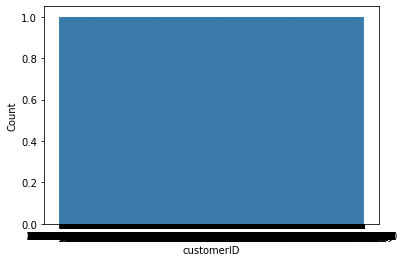

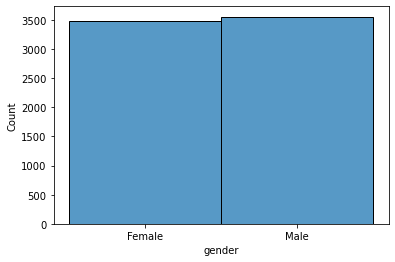

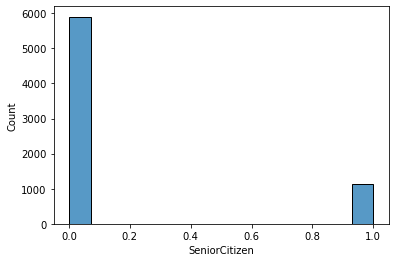

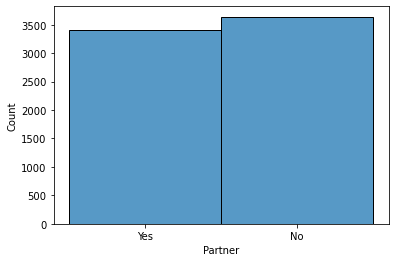

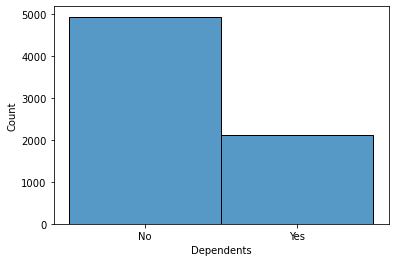

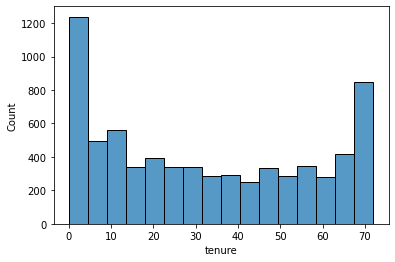

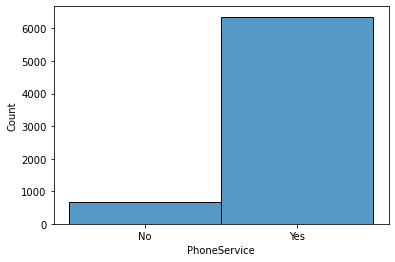

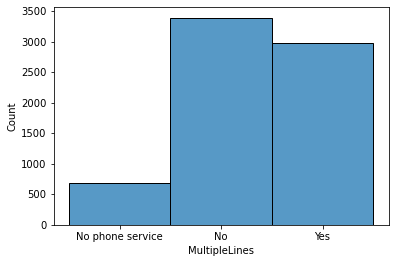

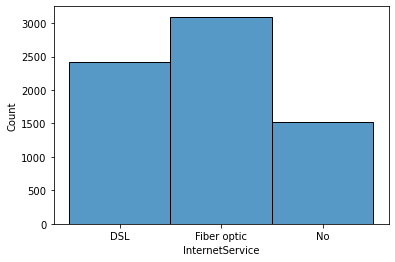

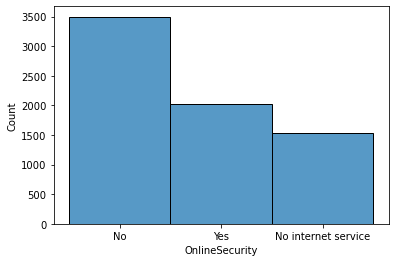

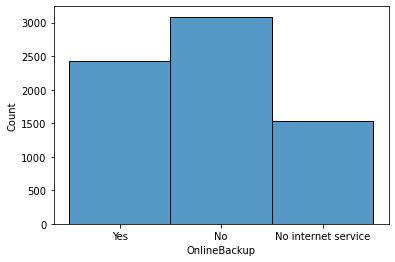

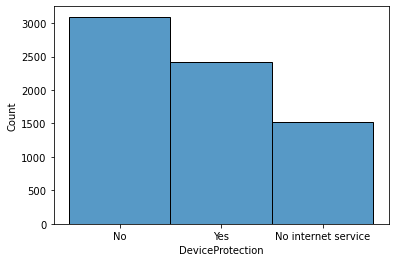

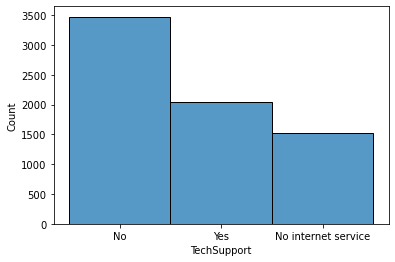

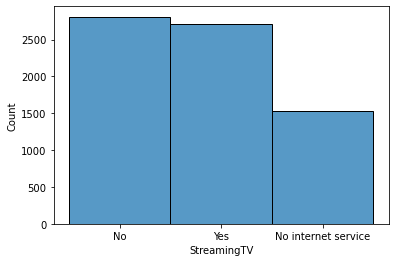

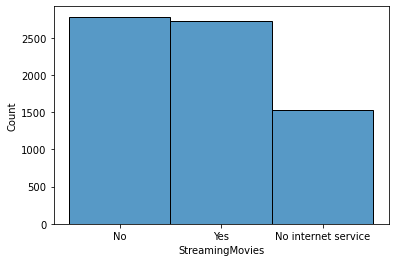

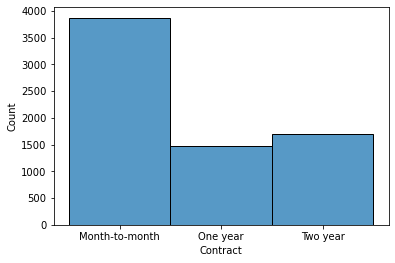

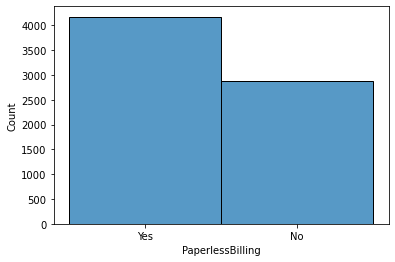

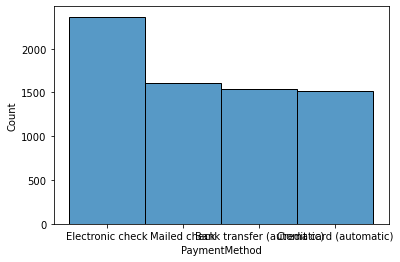

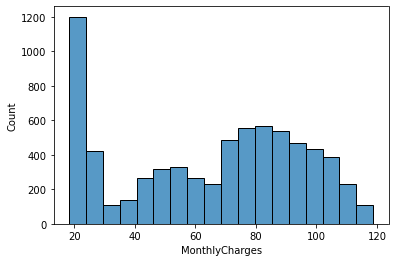

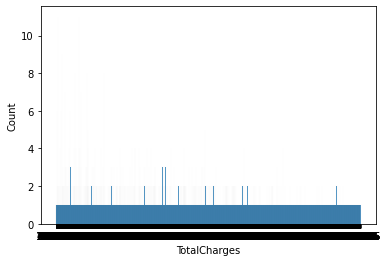

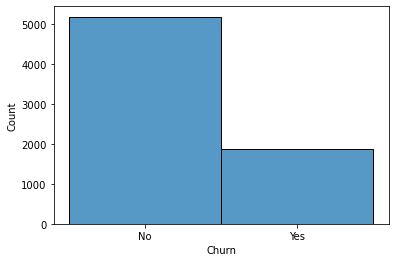

In [8]:
for i in data:
    sns.histplot(x=i,data=data)
    plt.show()

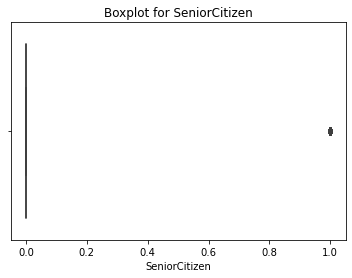

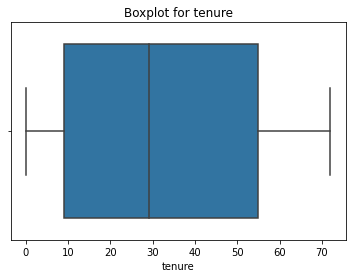

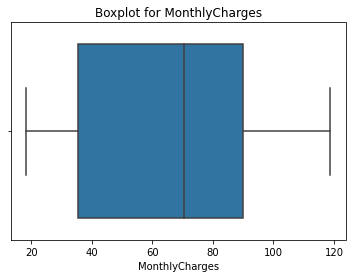

In [9]:
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

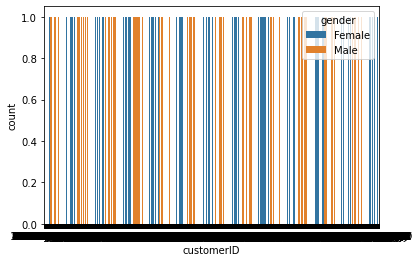

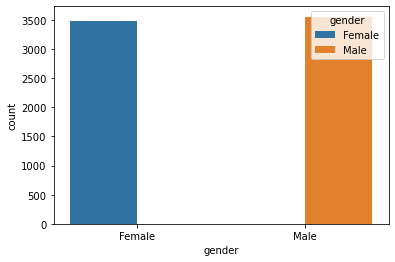

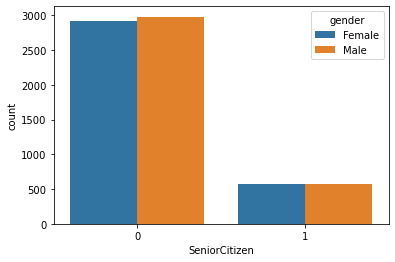

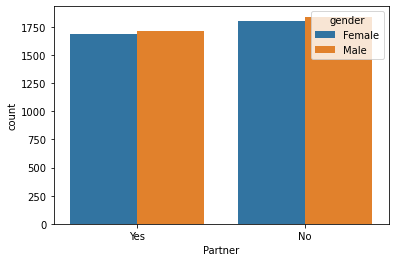

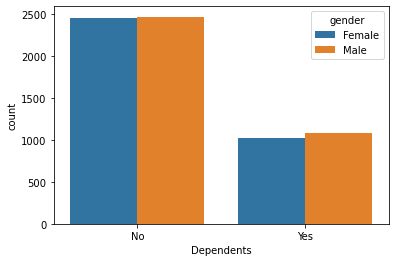

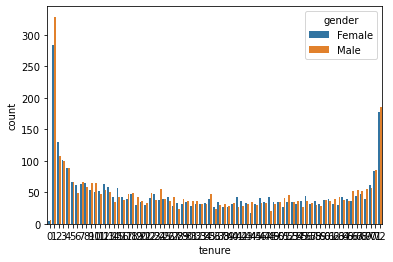

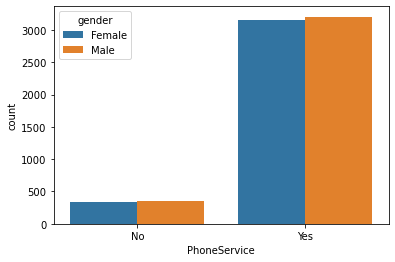

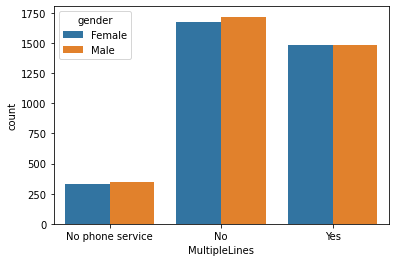

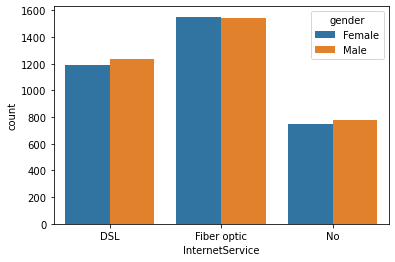

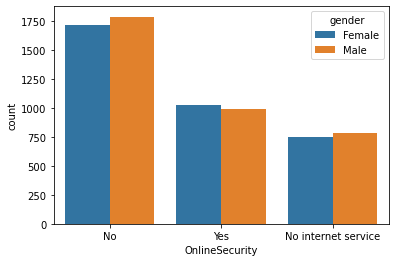

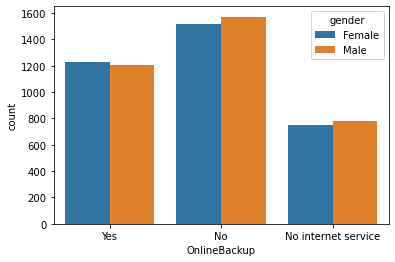

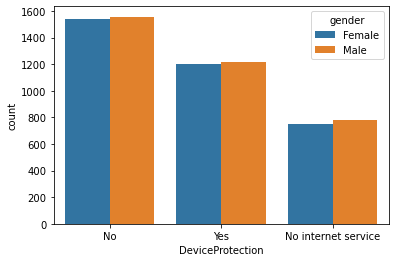

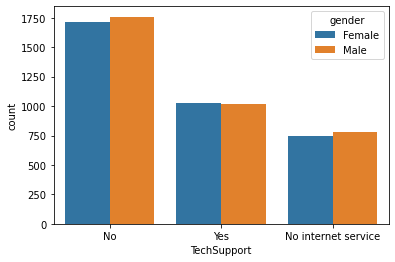

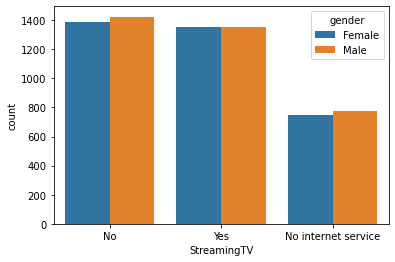

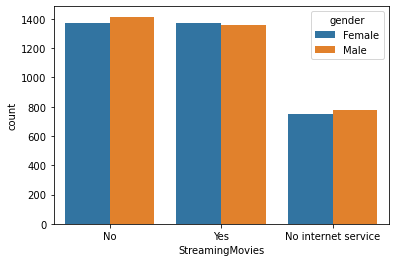

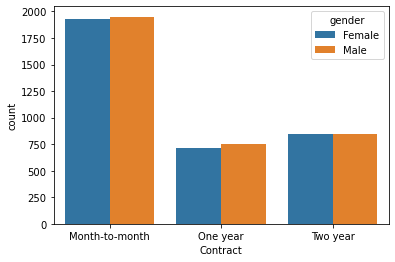

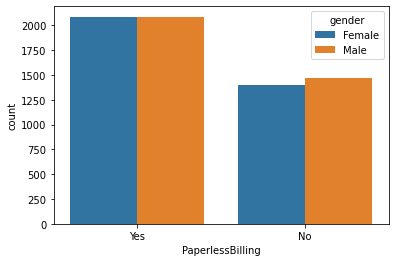

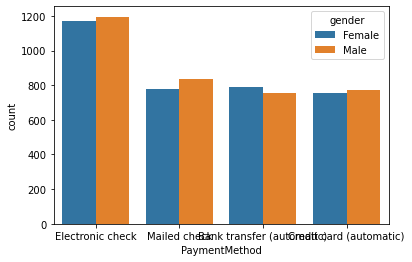

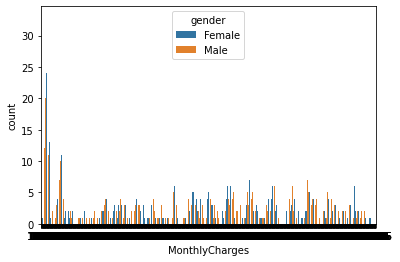

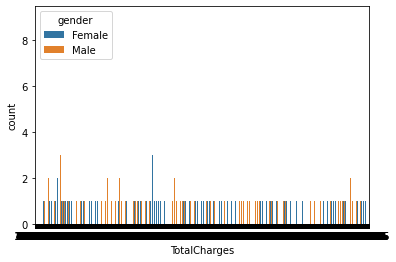

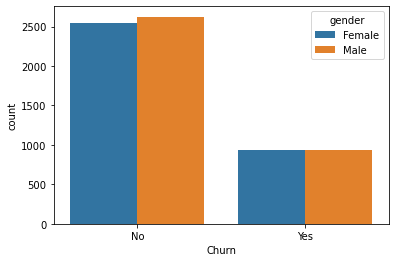

In [10]:
for i in data:
    sns.countplot(x=i, hue="gender", data=data)
    plt.show()

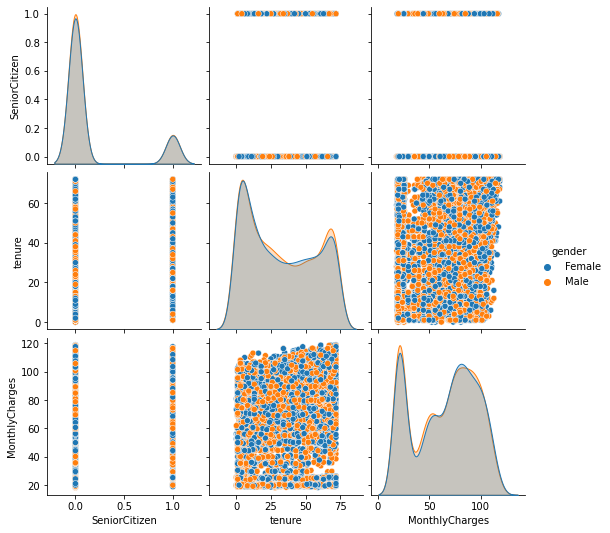

In [11]:
sns.pairplot(data=data, hue="gender")

# Data Preprocessing

****************

#### Checking for nulls

In [12]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Checking for any duplicates

In [13]:
data.duplicated().sum()

0

#### encoding categorical data

In [14]:
label_encoder = LabelEncoder()

In [15]:
data['gender'] = label_encoder.fit_transform(data['gender'])
data['Partner'] = label_encoder.fit_transform(data['Partner'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])
data['TotalCharges'] = label_encoder.fit_transform(data['TotalCharges'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

#### Data after encoding

In [16]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


# Machine Learning

*******

#### split data

In [17]:
x= data.drop(['Churn','customerID'],axis=1)
y= data.Churn
x.shape,y.shape

((7043, 19), (7043,))

#### Train models to see the highest model accuracy

In [18]:
classifiers=[
LogisticRegression(),
DecisionTreeClassifier(),
RandomForestClassifier(),
KNeighborsClassifier(),
SVC(),
GaussianNB(),
]
acclist=[]
acc={}
for clas in classifiers:
    acclist=[]
    for i in range(5):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
        clas.fit(x_train,y_train)
        y_pred=clas.predict(x_test)
        acclist.append(accuracy_score(y_test,y_pred))
    acc[clas]=[np.mean(acclist),np.std(acclist)]
acc

{LogisticRegression(): [0.795929957406531, 0.004631189710449654],
 DecisionTreeClassifier(): [0.725982016090866, 0.003726459003318432],
 RandomForestClassifier(): [0.7895882631329864, 0.0029112269757178896],
 KNeighborsClassifier(): [0.7498343587316612, 0.005668075692032161],
 SVC(): [0.7379081874112636, 0.004650494461538378],
 GaussianNB(): [0.7541883577851396, 0.0027203233058589573]}

## Use LogisticRegression because it has the highest accuracy

**********

#### train model

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [20]:
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

#### Model Evaluation

In [21]:
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.8102224325603408

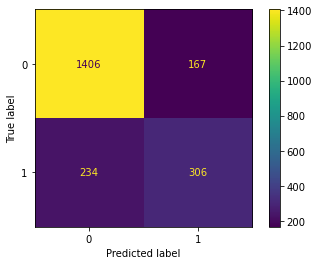

In [22]:
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(lr, x_test, y_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1573
           1       0.65      0.57      0.60       540

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



## Use feature selection

In [24]:
x1=data[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
y= data.Churn
x.shape,y.shape
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=45)

In [25]:
lr.fit(x1,y)

LogisticRegression()

In [26]:
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7974443918599148

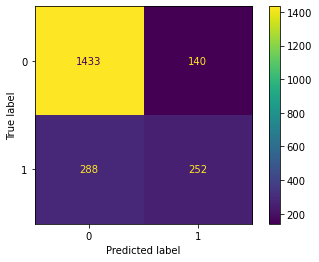

In [27]:
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(lr, x_test, y_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1573
           1       0.64      0.47      0.54       540

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.80      0.79      2113



#### Predicting Churn

In [29]:
lr.predict([[1,30,50,60]])

array([0])